<a href="https://colab.research.google.com/github/nachovera93/IA-Documents/blob/main/Practico_5_Recomendaci%C3%B3n_Ricardo_Vera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diplomado IA: Inteligencia Artificial I - Parte 2**. <br> Práctico 5: Recomendación de Contenido
---
---

**Profesores:**
- Julio Hurtado
- Felipe del Río

**Ayudante:**

---
---

# Agenda

Diplomado IA: Inteligencia Artificial I - Parte 2.  Práctico 5: Recomendación de Contenido

<!-- Agenda:
 * Problema
 * Preparación
 * Entrenamiento
 * Recomendación -->

Problema

Preparación

> Datos

> Instalación de librerias

Entrenamiento

> Dataset

> Funciones de Entrenamiento

> Funciones para mostrar resultados

> Modelo

> Entrenamiento

Recomendación

> Obtención de Descriptores

> Encontrar similares

> Recomendación

> Metricas de Comparación


# Objetivo del Laboratorio
 
Una parte importante para consolidar nuevos conocimientos es ponerlos en práctica. Después de algunas clases donde hemos visto varios métodos y algoritmos diferentes es bueno tomar una pausa para poder aplicar estos conocimientos. 

En este laboratorio los aplicaremos a un ejemplo más real que los que hemos visto en laboratorios pasados. El objetivo es corroborar el entendimiento de los conceptos claves, y que después podremos ser capaces de aplicarlos en diferentes problemas que nos podemos encontrar en la vida real.

No solo los modelos tienen que aprender.


## Problema
 
En este laboratorio aplicaremos los conocimientos vistos en las clases anteriores para entrenar un modelo que pueda recomendar contenido a un usuario de una red social, en base a sus interacciones pasadas.
 
En esta red social, una interacción está conformada por una imagen y un comentario, escrito por un usuario. El objetivo es generar una reacción en los usuarios, por lo que debemos recomendar o mostrarle imágenes de otros usuarios que tienen imágenes con textos similares. Por esta razón, tenemos que tener acceso tanto a las imágenes como al texto escrito por los usuarios para poder encontrar recomendaciones que causen un accionar en el usuario.


# Preparación
## Datos
 
Los datos son una de las partes más importantes al momento de entrenar modelos de aprendizaje. Si los datos no representan el problema que queremos resolver es muy difícil que nuestro modelo pueda encontrar una solución adecuada. De ahí viene la famosa expresión **"garbage in, garbage out"**.
 
En esta oportunidad utilizaremos un dataset abierto creado a partir de la red social **Pinterest**. Este dataset nos entrega imágenes y un comentario creado por un usuario. Por razones de *copyright* no tenemos acceso a las imágenes mismas, ya que esto trasgredería los términos y condiciones de esta red social. Para compartir las imagenes, esta base de datos comparte los descriptores de estas, encontrados con un modelo pre-entrenados sobre Imagenet.
 
Cada elemento de nuestro dataset está conformado por un par imagen-texto asociado a un usuario. Dado esto, definiremos como nuestra tarea, clasificar a qué usuario pertenece cada par imagen-texto del dataset.
 


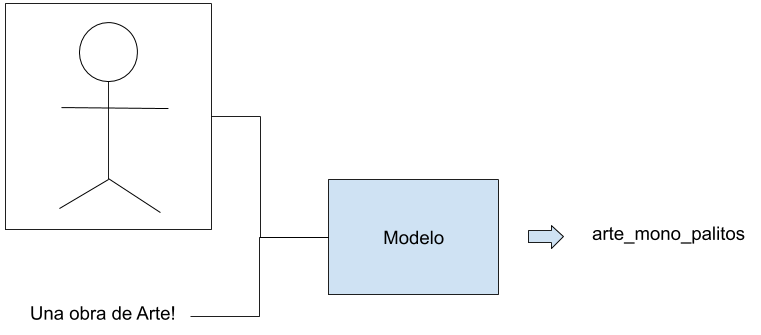

Para poder comenzar, lo primero que debemos hacer es descargar y descomprimir los archivos utilizando los siguientes comandos:

In [ ]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fs4k2zc5j5-3.zip

--2020-09-03 14:23:38--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fs4k2zc5j5-3.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.28.72
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.28.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2160173792 (2.0G) [application/octet-stream]
Saving to: ‘fs4k2zc5j5-3.zip’

fs4k2zc5j5-3.zip    100%[===================>]   2.01G  21.5MB/s    in 98s     

2020-09-03 14:25:16 (21.0 MB/s) - ‘fs4k2zc5j5-3.zip’ saved [2160173792/2160173792]



In [ ]:
!unzip fs4k2zc5j5-3.zip

Archive:  fs4k2zc5j5-3.zip
  inflating: text_train.txt          
  inflating: text_test.txt           
  inflating: imag_val.txt            
  inflating: val_test_users.txt      
  inflating: images.rar              
  inflating: imag_train.txt          
  inflating: text_val.txt            
  inflating: train_users.txt         
  inflating: imag_test.txt           


In [ ]:
!wget https://data.mendeley.com/public-files/datasets/fs4k2zc5j5/files/cc4e3cb0-f2cf-4f4a-9395-a8215dc68b45/file_downloaded
!rm imag_train.txt
!mv file_downloaded imag_train.txt

--2020-09-03 14:26:13--  https://data.mendeley.com/public-files/datasets/fs4k2zc5j5/files/cc4e3cb0-f2cf-4f4a-9395-a8215dc68b45/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/96781484-1d06-4610-9c59-bb918db16f53 [following]
--2020-09-03 14:26:14--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/96781484-1d06-4610-9c59-bb918db16f53
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.62.232
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.62.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1699873240 (1.6G) [text/pla

Podemos verificar que tenemos todos los datos en nuestro Colab es revisar el navegador de archivos que se encuentra en la izquierda de nuestro navegador.

#**Actividad 1:**

<br>

####**1- Asuma el contexto actual, usted trabaja en una empresa que tiene una red social muy similar a Facebook y quiere recomendar contenido a los usuarios. Responda las siguientes preguntas:**

<br>

####**a) ¿Qué información recolectaría para poder entrenar su modelo?**  

<br> 

Asumiendo un contexto en el que mi red social se base en videos y peliculas, la información que recolectaria sería por ejemplo: 
<br>

Qué búsquedas realizan, qué dispositivos usan, cuál es su día preferido, cuánto tiempo emplean en el servicio y en cada uno de los contenidos, si ven los capítulos enteros o parcialmente e, incluso, qué fragmentos vuelven a ver, momentos en los que abandonan y si lo recuperan, las valoraciones de los consumidores, qué preferencias tienen en común con sus amigos o con la audiencia de su misma zona geográfica, la información de sus perfiles en redes sociales…

<br> 

###**b) ¿Cómo usaría la información recolectada?**

<br>

Con la información recolectada me basaría en algoritmos de recomendaciones como Youtube descritos en este paper[1]. Que consiste en 2 redes neuronales:
 * Una que reduce el corpus de videos del orden de millones a un numero limitado de videos según variables como el historial, la consulta de busqueda,etc.
 * Otra que se basa en un sistema de clasificación que toma en cuenta la salida de la red anterior y toma en cuentas otras caracteristicas heterogeneas como el idioma del usuario, video e impresiones anteriores. Luego, se clasifica de la misma manera en el orden  de probabilidad de que un video determinado sea el próximo que un usuario probablemente verá a continuación. Se seleccionará el top n según el requisito.

 ![Recommending what video to watch](https://i.blogs.es/bb4f61/youtube/1366_2000.jpg)
*Recommendation system.[1]*

<br>





###**c)¿Existe información externa (que no puede ser recolectada por su empresa) que pueda ser útil para mejorar el rendimiento del modelo? Si su respuesta es afirmativa, de un ejemplo.**

<br>

Podría ser información recolectada de lo que habla, de que palabras o nombres de serie repite mas dia a dia con su entorno a través de un acceso al microfono en su celular. Pero estariamos invadiendo la privacidad. 
<br>

Esto nos serviría ya que asi podriamos tener una idea mas precisa de su personalidad y asi tener mas claro sus gustos, o como se menciono antes, si es que este hace mención en su dia a dia de alguna serie, pelicula que quiere ver pero no sabe su nombre o si siempre se le olvida ver al llegar a casa, etc.

####**Bibliografia**


<br>


[1]https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/45530.pdf








## Instalación de librerías

Al igual que el jueves pasado, utilizaremos la librería `transformers` que nos facilita la utilización de modelos de texto como Bert, ademas de tokenizadores correspondientes.





In [ ]:
!pip install -q transformers

     |████████████████████████████████| 1.4MB 8.1MB/s 
     |████████████████████████████████| 890kB 27.7MB/s 
     |████████████████████████████████| 2.9MB 20.7MB/s 


# Entrenamiento

In [ ]:
import numpy as np
import pandas as pd
import os
from random import sample

import torch
from torch.utils.data import Dataset, DataLoader

import transformers
from transformers import BertTokenizer, BertModel
from transformers import PretrainedConfig

## Dataset

Creamos la clase `ContentRecommender` y su objetivo es cargar los datos y entregarlos de tal forma que sea aceptado por la clase `DataLoader` de PyTorch. 

In [ ]:
class ContentRecommender(Dataset):
    def __init__(self, root_dir, data_set='train', num_classes=-1, sub_classes=None, tokenizer=None, transform=None, amount_triplet=3):
        if data_set == 'train':
            self.img_data = pd.read_csv(os.path.join(root_dir,'./imag_train.txt'), header=None).values
            self.txt_data = self.read_file_text(os.path.join(root_dir,'./text_train.txt'))
            self.targets = self.read_file_id(os.path.join(root_dir,'./train_users.txt'))
        elif data_set == 'val':
            self.img_data = pd.read_csv(os.path.join(root_dir,'./imag_val.txt'), header=None).values 
            self.txt_data = self.read_file_text(os.path.join(root_dir,'./text_val.txt'))
            self.targets = self.read_file_id(os.path.join(root_dir,'./val_test_users.txt'))
        elif data_set == 'test':
            self.img_data = pd.read_csv(os.path.join(root_dir,'./imag_test.txt'), header=None).values 
            self.txt_data = self.read_file_text(os.path.join(root_dir,'./text_test.txt'))
            self.targets = self.read_file_id(os.path.join(root_dir,'./val_test_users.txt'))
        else:
            raise('data_Set must be some of [train, val, test]')

        self.transform = transform
        self.tokenizer = tokenizer
        self.amount_triplet = amount_triplet

        self.sub_classes = None
        if num_classes != -1 or sub_classes:
            self.sub_set(num_classes, sub_classes)

        self.size_dataset()

    def sub_set(self, num_classes, sub_classes):
        if sub_classes is None:
            sample_cls = sample(list(set(self.targets)),num_classes)
        else:
            sample_cls = sub_classes

        d_img = []
        d_txt = []
        t = []
        for i,cls in enumerate(sample_cls):
            sample_data = list((torch.tensor(self.targets) == cls).nonzero())

            d_img.extend(self.img_data[sample_data])
            d_txt.extend([ self.txt_data[elem] for elem in sample_data ])
            t.extend([int(i)]*len(sample_data))
        
        self.sub_classes = sample_cls
        self.img_data = torch.tensor(d_img)
        self.txt_data = d_txt
        self.targets = t

    def read_file_id(self, name_file):
        data = []
        with open(name_file) as f: 
            for line in f: 
                data.append(int(line.strip()))
        return data

    def read_file_text(self, name_file):
        data = []
        with open(name_file) as f: 
            for line in f: 
                data.append(line.strip())
        return data

    def __len__(self):
        return len(self.txt_data)

    def __getitem__(self, idx):   #Función para entregar a nuestro dataloader
        comment_text = str(self.txt_data[idx])
        comment_text = " ".join(comment_text.split())

        inputs_text = self.tokenizer.encode_plus(
                    comment_text,
                    None,
                    add_special_tokens=True,
                    max_length=100,
                    pad_to_max_length=True,
                    return_token_type_ids=True,
                    truncation=True,
                )

        return {
            'text_ids': torch.tensor(inputs_text['input_ids'], dtype=torch.long), #Texto
            'text_mask': torch.tensor(inputs_text['attention_mask'], dtype=torch.long),  #Mascara
            'text_token_type_ids': torch.tensor(inputs_text['token_type_ids'], dtype=torch.long), 
            'targets': torch.tensor(self.targets[idx], dtype=torch.float), #target / usuario
            'img_data': self.img_data[idx],
            'idx_data': idx
            }

    def size_dataset(self):
        print('We have {} Image with {} features with {} texts. \
                The amount of different users is {}'.format(self.img_data.shape[0],
                                                            self.img_data.shape[1],
                                                            len(self.txt_data),
                                                            len(set(self.targets))))

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
num_classes = 10

trainset = ContentRecommender('./', 'train', num_classes=num_classes, tokenizer=tokenizer)
testset = ContentRecommender('./', 'test', sub_classes=trainset.sub_classes, tokenizer=tokenizer)

batch_size = 16

loaders = {
    'train': DataLoader(trainset, batch_size=batch_size, shuffle=True),
    'test': DataLoader(testset, batch_size=batch_size, shuffle=False),
    'val': DataLoader(testset, batch_size=batch_size, shuffle=False),
}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)


We have 4000 Image with 4096 features with 4000 texts.                 The amount of different users is 10
We have 1000 Image with 4096 features with 1000 texts.                 The amount of different users is 10


AlexNet:

<figure>
<center>
<img src='https://www.mdpi.com/remotesensing/remotesensing-09-00848/article_deploy/html/images/remotesensing-09-00848-g001.png' height="500" />
<figcaption>Modelo Alexnet</figcaption>
</center>

</figure>

In [ ]:
idx = torch.randint(0, len(trainset.targets), (1,1)).item()
print("Un ejemplo del dataset:")
print(trainset.txt_data[idx])
print(trainset.img_data[idx])
print(trainset.targets[idx])

idxs_user = list((torch.tensor(trainset.targets) == trainset.targets[idx]).nonzero())
for id in idxs_user[:5]:
    print(trainset.txt_data[id])


Un ejemplo del dataset:
italy
tensor([-1.8317, -3.6347, -0.0223,  ..., -6.9075, -7.7278, -8.8429],
       dtype=torch.float64)
3
awesome
naunton england
montelcino tuscany italy
by the ohio river by quang ho
mother and daughter unknown source


## Funciones de Entrenamiento

Crearemos varias funciones que nos ayudarán el entrenaminto de modelos reiteradas veces en este práctico. Les recomendamos que traten de entender cada una de estas funciones pues podrán reforzar conocimientos que ya han aprendido en el diplomado hasta ahora.

In [ ]:
def run_epoch(phase, model, loader, criterion, optimizer=None):
    n_batches = len(loader)
    if phase == 'train':
        model.train()
    elif phase == 'val' or 'test':
        model.eval()
        
    cum_loss = 0.0
    cum_acc = 0.0
    for n_batch, data in enumerate(loader, start=1):
        if phase == 'train': # Limpiamos los gradientes solo al entrenar
            optimizer.zero_grad()

        ids = data['text_ids'].to(device, dtype=torch.long)
        mask = data['text_mask'].to(device, dtype=torch.long)
        token_type_ids = data['text_token_type_ids'].to(device, dtype=torch.long)
        img = data['img_data'].to(device, dtype=torch.float)
        targets = data['targets'].to(device, dtype=torch.long)
        
        result = model(ids, mask, token_type_ids, img) # Aquí se ejecuta nuestro modelo

        loss = criterion(result, targets) # Cálculamos la pérdida
        cum_loss += loss.item()
        _, preds = torch.max(result.data, 1)

        # accuracy = calculate_metrics(targets, preds)
        cum_acc += torch.sum(preds == targets.data)
        if phase == 'train':
            loss.backward() # Hacemos backpropagation solo en train
            optimizer.step() # Actualizamos parámetros solo en train

        current_cum_loss = cum_loss / n_batch
        current_cum_acc = 100 * cum_acc / (n_batch * batch_size) 

        print(f'\r{phase.upper()}-Batch {n_batch}/{n_batches} '
              f'Loss: {current_cum_loss:.4f} '
              f'Acc: {current_cum_acc:.2f}% ', end='')
    
    epoch_loss = float(cum_loss / n_batch)
    epoch_acc = float(100 * cum_acc / (n_batch * batch_size))

    return epoch_loss, epoch_acc

def run_training(model, loaders, optimizer, criterion, n_epochs, scheduler):
    phases = ['train', 'val']
    history = {
        'train': {'loss': [], 'acc': []},
        'val': {'loss': [], 'acc': []}
    }

    print(f"Validating model before training")
    with torch.no_grad():
        val_loss, val_acc = run_epoch('val', model, loaders['val'], criterion)
    print()

    history['val']['loss'].append(val_loss)
    history['val']['acc'].append(val_acc)
    for epoch in range(1, n_epochs + 1):
        print(f"Epoch N°{epoch}")
        for phase in phases:
            epoch_loss, epoch_acc = run_epoch(phase, model, loaders[phase], criterion, optimizer=optimizer)
            # Registramos las pérdidas y accuracy por época, por fase
            history[phase]['loss'].append(epoch_loss)
            history[phase]['acc'].append(epoch_acc)
            print("")
        
        scheduler.step(history['val']['loss'][-1])

    return history

## Funciones para mostrar resultados

Definamos también algunas funciones que nos ayudarán a visualizar el entrenamiento y sus resultados de mejor forma.

In [ ]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sklearn.metrics

def graph_metrics(metricas_test, metricas_train, title=''):
    fig, ax = plt.subplots()
    plt.style.use('seaborn-white')
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3f'))
    plt.plot(range(1, int(len(metricas_train) + 1)), metricas_train, marker='o')
    plt.plot(range(int(len(metricas_test))), metricas_test, marker='o')
    plt.legend(['Train', 'Val'])
    plt.title(title)
    plt.show()


def graph_training_metrics(history):
    for metric in ['loss', 'acc']:
        title = f'{metric.capitalize()} vs N° Épocas'
        graph_metrics(history['val'][metric], history['train'][metric], title=title)


def print_report(train_history):
    graph_training_metrics(train_history)

    train_loss = train_history['train']['loss'][-1]
    train_acc = train_history['train']['acc'][-1]
    val_loss = train_history['val']['loss'][-1]
    val_acc = train_history['val']['acc'][-1]
    print(f'Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.2f}%')

## Modelo

La particularidad de este modelo es que debe unir dos representaciones (una imagen y otra texto) para realizar la clasificación.

En el caso de la imagen, la representación nos la entrega el dataset que estamos utilizando. Esta viene dada por un vector de características, *feature vector*, extraída por un modelo convolucional pre-entrenado.

Para el texto, utilizamos BERT, un modelo pre-entrenado del tipo transformer que se utiliza para texto. Este nos permitirá aprovechar este pre-entrenamiento para encontrar una representación mas rica que entrenando un modelo simple.

Ambas representaciones son pasadas por capas *fully-connected* para disminuir su dimensionalidad, luego concatenadas y pasadas por una nueva capa *fully-connected*. Por último, esta representación es pasada por el clasificador para obtener la predicción.

In [ ]:
import torch

class ModelClass(torch.nn.Module):
    def __init__(self, pretrained=True, num_classes=117):
        super(ModelClass, self).__init__()
        if pretrained:
            self.l1_txt = transformers.BertModel.from_pretrained('bert-base-uncased')
        else:
            config = PretrainedConfig.from_pretrained('bert-base-uncased')
            self.l1_txt = transformers.BertModel(config)

        self.l2_txt = torch.nn.Linear(768, 64)
        self.l1_img = torch.nn.Linear(4096, 64)
        self.l1_join = torch.nn.Linear(64+64, 32)
        self.drop = torch.nn.Dropout(0.3)
        self.relu = torch.nn.ReLU(inplace=True)
        self.l2_join = torch.nn.Linear(32, num_classes)
    
    def forward(self, ids, mask, token_type_ids, img_data, features=False):
        _, output_text = self.l1_txt(ids, attention_mask=mask, token_type_ids=token_type_ids)
        output_text = self.l2_txt(output_text)
        output_img = self.l1_img(img_data)

        output_text = self.drop(self.relu(output_text))
        output_img = self.drop(self.relu(output_img))
        output = torch.cat([output_text, output_img], dim=1)

        output = self.l1_join(torch.cat([output_text, output_img], dim=1))
        output = self.drop(self.relu(output))
        if features:
            return output
        output = self.l2_join(output)
        return output

### Baseline

Comparar el funcionamiento de nuestro modelo es fundamental para ver si lo que estamos haciendo funciona bien o mal. En esta ocasión utilizaremos un segundo modelo para poder compararnos. En este solo le entregamos solo la información de las imágenes a este segundo modelo para realizar la recomendación, esperando que este sea peor que el modelo completo.

In [ ]:
class ModelClassImage(torch.nn.Module):
    def __init__(self, pretrained=True, num_classes=117):
        super(ModelClassImage, self).__init__()

        self.l1_img = torch.nn.Linear(4096, 64)
        self.drop = torch.nn.Dropout(0.3)
        self.relu = torch.nn.ReLU(inplace=True)
        self.l2_img = torch.nn.Linear(64, num_classes)

    def forward(self, ids, mask, token_type_ids, img_data, features=False):
        output = self.l1_img(img_data)
        output = self.drop(self.relu(output))
        if features:
            return output
        output = self.l2_img(output)
        return output

## Entrenamiento

Al momento del entrenamiento debemos seleccionar una función de perdida apropiada y un algoritmo de optimización que se comporte bien para este problema.

En este caso al ser un problema de clasificación podemos utilizar la función de pérdida *Cross Entropy*, muy utilizada para este tipo de problemas.

Una alternativa para la función de pérdida podría ser la función *Triplet Loss*, esta busca que el modelo genere representaciones cercanas para elementos de un mismo usuario y genere representaciones más distantes para elementos de usuarios distintos. Un  problema con esa alternativa, es que necesitamos generar triples para el entrenamiento (de ahí su nombre) con elementos de ancla, positivo y negativo para cada iteración en entrenamiento, causando que el proceso sea más complejo, en tiempo y recursos.

Tal como mencionamos en la clase de optimizadores, uno de los algoritmos de optimización en deep learning mas completos y utilizados es Adam, que tiene los beneficios de momentum y la normalización, generando learning rate locales para cada parametros.

Además utilizamos un scheduler en base a la perdida de nuestro set de validación.




Validating model before training


/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


VAL-Batch 63/63 Loss: 2.3717 Acc: 9.03% 
Epoch N°1
TRAIN-Batch 250/250 Loss: 2.1376 Acc: 22.18% 
VAL-Batch 63/63 Loss: 1.8715 Acc: 37.10% 
Epoch N°2
TRAIN-Batch 250/250 Loss: 1.8952 Acc: 31.50% 
VAL-Batch 63/63 Loss: 1.6927 Acc: 43.75% 
Epoch N°3
TRAIN-Batch 250/250 Loss: 1.7886 Acc: 36.00% 
VAL-Batch 63/63 Loss: 1.6059 Acc: 43.65% 
Epoch N°4
TRAIN-Batch 250/250 Loss: 1.6891 Acc: 40.25% 
VAL-Batch 63/63 Loss: 1.5314 Acc: 45.93% 
Epoch N°5
TRAIN-Batch 250/250 Loss: 1.6304 Acc: 42.03% 
VAL-Batch 63/63 Loss: 1.5174 Acc: 48.21% 
Epoch N°6
TRAIN-Batch 250/250 Loss: 1.5883 Acc: 42.60% 
VAL-Batch 63/63 Loss: 1.4983 Acc: 45.73% 
Epoch N°7
TRAIN-Batch 250/250 Loss: 1.5428 Acc: 44.55% 
VAL-Batch 63/63 Loss: 1.4813 Acc: 47.12% 
Epoch N°8
TRAIN-Batch 250/250 Loss: 1.5079 Acc: 46.03% 
VAL-Batch 63/63 Loss: 1.4802 Acc: 46.43% 
Epoch N°9
TRAIN-Batch 250/250 Loss: 1.4639 Acc: 47.83% 
VAL-Batch 63/63 Loss: 1.4565 Acc: 48.02% 
Epoch N°10
TRAIN-Batch 250/250 Loss: 1.4326 Acc: 47.75% 
VAL-Batch 63/63 Loss

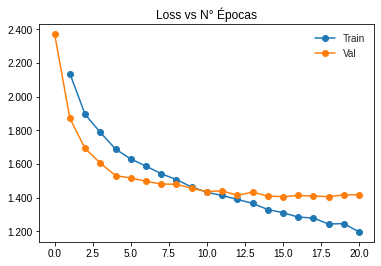

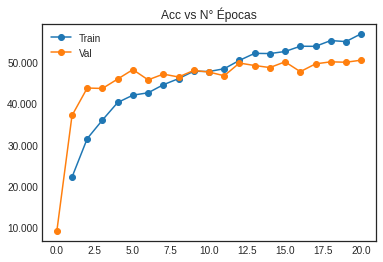

Train Loss: 1.1969 - Train Acc: 56.90%
Val Loss: 1.4183 - Val Acc: 50.50%


In [ ]:
from torch import optim
from torch.optim import lr_scheduler
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ModelClass(pretrained=True, num_classes=num_classes)
model.to(device)

criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-4) #1e-5
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer)

epochs = 20
history = run_training(model, loaders, optimizer, criterion, epochs, scheduler)

print_report(history)

Validating model before training
VAL-Batch 29/63 Loss: 3.0565 Acc: 1.94% 

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


VAL-Batch 63/63 Loss: 2.6882 Acc: 11.41% 
Epoch N°1
TRAIN-Batch 250/250 Loss: 1.9175 Acc: 31.68% 
VAL-Batch 63/63 Loss: 1.5661 Acc: 44.74% 
Epoch N°2
TRAIN-Batch 250/250 Loss: 1.5974 Acc: 41.70% 
VAL-Batch 63/63 Loss: 1.5203 Acc: 45.83% 
Epoch N°3
TRAIN-Batch 250/250 Loss: 1.5040 Acc: 46.40% 
VAL-Batch 63/63 Loss: 1.4653 Acc: 48.02% 
Epoch N°4
TRAIN-Batch 250/250 Loss: 1.4271 Acc: 48.83% 
VAL-Batch 63/63 Loss: 1.4422 Acc: 47.12% 
Epoch N°5
TRAIN-Batch 250/250 Loss: 1.3562 Acc: 50.13% 
VAL-Batch 63/63 Loss: 1.4241 Acc: 49.60% 
Epoch N°6
TRAIN-Batch 250/250 Loss: 1.2945 Acc: 52.68% 
VAL-Batch 63/63 Loss: 1.4082 Acc: 49.60% 
Epoch N°7
TRAIN-Batch 250/250 Loss: 1.2625 Acc: 54.20% 
VAL-Batch 63/63 Loss: 1.4212 Acc: 48.71% 
Epoch N°8
TRAIN-Batch 250/250 Loss: 1.2234 Acc: 54.90% 
VAL-Batch 63/63 Loss: 1.4093 Acc: 48.51% 
Epoch N°9
TRAIN-Batch 250/250 Loss: 1.1851 Acc: 55.95% 
VAL-Batch 63/63 Loss: 1.3997 Acc: 51.98% 
Epoch N°10
TRAIN-Batch 250/250 Loss: 1.1492 Acc: 57.30% 
VAL-Batch 63/63 Los

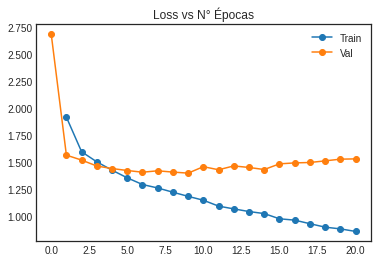

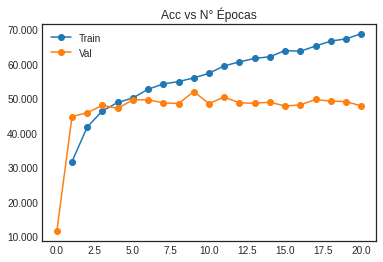

Train Loss: 0.8610 - Train Acc: 68.78%
Val Loss: 1.5314 - Val Acc: 47.82%


In [ ]:
from torch import optim
from torch.optim import lr_scheduler
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_img = ModelClassImage(pretrained=True, num_classes=num_classes)
model_img.to(device)

criterion = CrossEntropyLoss()
optimizer = Adam(model_img.parameters(), lr=1e-4) #1e-5
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer)

epochs = 20
history = run_training(model_img, loaders, optimizer, criterion, epochs, scheduler)

print_report(history)

#**Actividad 2**

<br>

###**1 - Con respecto a los conocimientos adquiridos hasta el momento:**
<br>

####**a)Enumere 2 limitaciones de nuestro modelo. Sugiera una mejora en base a estas limitaciones.** 


<br>

Entre las limitaciones que se pueden apreciar que hay sobreentrenamiento u overfitting, ya que se aprecia un buen ajuste a los datos del entrenamiento pero el modelo no esta generalizando bien los datos nuevos. En otras palabras, el modelo aprendió patrones específicos de los datos de entrenamiento, que son irrelevantes en otros datos. 
<br>

Hay varias maneras en las que podemos reducir el sobreajuste en modelos de aprendizaje profundas. La mejor opción es obtener más datos de entrenamiento. Otra forma de reducir el sobreajuste es reducir la capacidad del modelo para memorizar los datos de entrenamiento . Como tal, el modelo deberá enfocarse en los patrones relevantes en los datos de entrenamiento, lo que resulta en una mejor generalización.

 

<br>

####**b)En base a los temas vistos hasta ahora en el diplomado, sugiera una mejora que podría hacerle a este modelo.**

<br>

Podemos intentar hacer algo con el sobreajuste. Hay diferentes opciones para hacer eso. Como por ejemplo, reducir la capacidad de la red eliminando capas o reduciendo la cantidad de elementos en las capas ocultas.
<br>

Aplicar regularización, que se reduce a agregar un costo a la función de pérdida para pesos grandes.
<br>

Usar capas de exclusión, que eliminarán aleatoriamente ciertas características al establecerlas en cero 
<br>

Reducir la capacidad de la red, nuestro modelo tiene una gran cantidad de parámetros entrenables. Cuanto mayor sea este número, más fácil será el modelo para memorizar la clase objetivo para cada muestra de entrenamiento. Obviamente, esto no es ideal para generalizar sobre nuevos datos.
<br>

Early Stopping, para calcular el rendimiento del modelo en el conjunto de validación durante el entrenamiento. Cuando el rendimiento del modelo en el conjunto de validación comience a disminuir, detener el entrenamiento para evitar el problema de sobreajuste causado por el entrenamiento continuo. 

<br>

####**c)Enumere dos formas que se le ocurran de realizar data augmentation con estos datos.**

<br>

1)Un aumento de datos basado en BERT para oraciones etiquetadas. Estas oraciones nuevas se podrían generar seleccionando palabras estocásticamente y reemplazándolas con otras palabras predichas por BERT. 
<br>

2)Un aumento de datos utilizando supervisión a distancia que explota ejemplos positivos como negativos. Aplicando un enfoque por etapas para ajustar BERT en varios conjuntos de datos, comenzando con los datos que están "más alejados" de los datos de prueba y terminando con el "más cercano". 

# Recomendación

Para recomendar contenido a usuarios nos vamos a basar en que usuarios prefieren contenido similar al que ya han interactuado antes. Es decir, imagenes y texto similares a los que a comentado pueden incentivar a generar una nueva interacción.

Una forma que tenemos de verificar si un par imagen-texto es similar a otro es mediante los descriptores que estos tipos de modelos generan para poder realizar la clasificación.



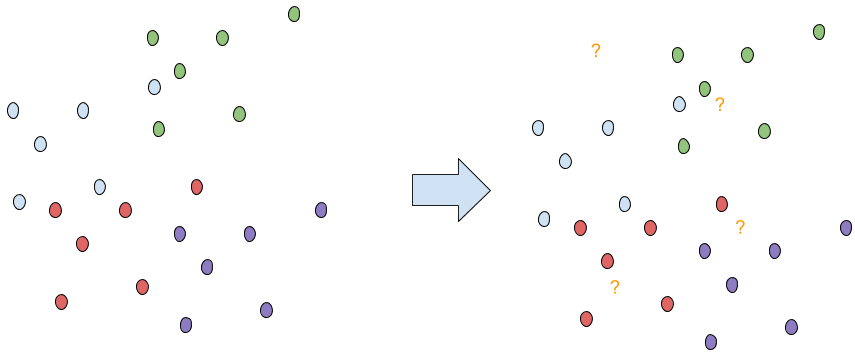

## Obtención de Descriptores

Para obtener una representación que tenga información tanto de la imagen como del texto, utilizamos el parámetro `features` de nuestro modelo. Con esto, en vez de devovlernos las predicciondes del modelo, nos entrega un descriptor de nuestro par imagen-texto.

La motivación de esto es la misma que la vista el jueves pasado, donde utilizan modelos pre-entrenados para encontrar descriptores de imagenes y luego entrenar un clasificador con estos. La diferencia es que aquí no los vamos a utilizar para entrenar un clasificador sino que lo vamos a utilizar para encontrar distancias entre los diferentes elementos de nuestro dataset.



In [ ]:
device = torch.device("cpu" if torch.cuda.is_available() else "cpu")
model.to(device)

test_f = np.zeros((len(testset), 32), dtype=np.float32)
model.eval()
for i, b in enumerate(testset):
    ids = b['text_ids'].to(device, dtype=torch.long).unsqueeze(0)
    mask = b['text_mask'].to(device, dtype=torch.long).unsqueeze(0)
    token_type_ids = b['text_token_type_ids'].to(device, dtype=torch.long).unsqueeze(0)
    img = b['img_data'].to(device, dtype=torch.float).unsqueeze(0)
    targets = b['targets'].to(device, dtype=torch.long).unsqueeze(0)
        
    test_f[i] = model(ids, mask, token_type_ids, img, features=True).detach().numpy()

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Hacer lo mismo que en `f` pero con los datos de train

train_f = np.zeros((len(trainset), 32), dtype=np.float16)
model.eval()
for i, b in enumerate(trainset):
    ids = b['text_ids'].to(device, dtype=torch.long).unsqueeze(0)
    mask = b['text_mask'].to(device, dtype=torch.long).unsqueeze(0)
    token_type_ids = b['text_token_type_ids'].to(device, dtype=torch.long).unsqueeze(0)
    img = b['img_data'].to(device, dtype=torch.float).unsqueeze(0)
    targets = b['targets'].to(device, dtype=torch.long).unsqueeze(0)
        
    train_f[i] = model(ids, mask, token_type_ids, img, features=True).half().detach().numpy()

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


## Encontrar similares

Una vez que tenemos los descriptores tanto del set de entrenamiento como del set de test podemos comenzar a calcular la distancia de los nuevos datos (test) con respecto a los utilizado durante el entrenamiento (train).

La intuicion de esto es que queremos recomendar los nuevos elementos a usuarios con gustos similares, y para esto nos basamos en alguna metrica de distancia entre ambos descriptores. Al encontrar la distancia menor de un elementos con otro sabemos a que usuario recomendarle esta nueva imagen, ya que conocemos el usuario que escribio el comentario en esa imagen en los datos de entrenamiento.

In [ ]:
from sklearn.metrics import pairwise_distances
import heapq

def find_similar_images(embedding, query_id=None, metrics=('euclidean',), topk=5):
    assert len(metrics) > 0
    assert topk <= 30 # to avoid requesting too many images
    n = embedding.shape[0]
    if query_id is None:
        query_id = np.random.randint(n)
    results = {}
    # --- show retrieved images for each metric
    for metric in metrics:
        #print('-------- retrieved with metric = %s -----' % metric)
        distances = pairwise_distances(embedding[query_id].reshape(1,-1), embedding, metric=metric)
        heap = []
        for i in range(n):
            if i == query_id:
                continue
            if len(heap) < topk:
                heapq.heappush(heap, (-distances[0][i], i))
            else:
                heapq.heappushpop(heap, (-distances[0][i], i))
        heap.sort(reverse=True)
        results[metric] = tuple(zip(*heap))
        results[metric] = (list(results[metric][1]), [-dist for dist in results[metric][0]])
    return results

In [ ]:
find_similar_images(test_f, metrics=('cosine','euclidean'), query_id=2, topk=10)

{'cosine': ([30, 0, 942, 57, 979, 827, 910, 941, 21, 966],
  [0.025915205,
   0.026036799,
   0.029011428,
   0.037687063,
   0.04167384,
   0.041967392,
   0.060394764,
   0.0633831,
   0.06483042,
   0.06744802]),
 'euclidean': ([30, 57, 979, 910, 941, 942, 21, 811, 99, 507],
  [3.8284545,
   3.8852983,
   4.464679,
   4.964318,
   4.9857593,
   5.0110106,
   5.042135,
   5.957896,
   6.0582366,
   6.1091948])}

## Recomendación

Tal como se menciono en la sección anterior, una vez con las distancias entre los vectores podemos recomendar nuevo contenido a un usuario considerando las distancias minimas entre estos.

In [ ]:
targets = np.array(testset.targets)
n_targets = len(set(targets))

In [ ]:
# Creo dicts con user_id => feats (los features concatenados de todos los items del usuario en train)
# y lo transformo a un np.array (user_repr)
from collections import defaultdict

user_dict = {}
for user_id, features in zip(trainset.targets, train_f):
    if not user_id in user_dict:
        user_dict[user_id] = []
    user_dict[user_id].append(features)

for user_id in user_dict:
    user_dict[user_id] = np.array(user_dict[user_id])

user_repr = np.array([user_dict[user_id] for user_id in range(n_targets)])

In [ ]:
# Calculo los scores para cada imágen en test con respecto a un usuario
metric = 'cosine'

n_users, n_images, _ = user_repr.shape
user_repr = user_repr.reshape(-1, 32)
dists = pairwise_distances(user_repr, test_f, metric=metric)
dists = dists.reshape(n_users, n_images, -1)
scores = dists.min(axis=1)

print(scores.shape)

(10, 1000)


In [ ]:
# Lista de recomendación
k = 10
recommendation_list = np.argpartition(scores, k)
recommendation_list = recommendation_list[:,:k]

En esta lista muestra el id de los elementos de nuestro base de datos (imagen-texto) que le podria interesar a 10 usuarios diferentes, en base a las menores distancias de los elementos que conocemos del usuario con cada uno de los nuevos elementos que nos llegaron.

In [ ]:
recommendation_list

array([[  8, 462,  42,  80,  36, 980, 805,  46,  65,  92],
       [184, 100, 149, 151, 190, 311, 136, 193, 188, 115],
       [238, 248, 826, 218, 221, 427, 267, 233, 409,  79],
       [309, 353, 321, 116, 300, 189, 826, 302, 418, 375],
       [464, 977, 753, 996, 461, 970, 459, 909, 917, 855],
       [531, 586, 970, 753, 538, 502, 518, 536, 173, 541],
       [756, 645, 646, 613, 630, 622, 660, 683, 665, 744],
       [714, 734, 765, 786, 700, 733, 732, 728, 720, 773],
       [508,  75, 828, 350, 887, 973, 507, 328, 970, 375],
       [493, 870, 827, 811, 810, 990, 589, 543, 406, 951]])

## Métricas de Comparación

Tal como vimos en clases, existen varias métricas que se pueden utilizar para comprobar el correcto funcionamiento de nuestro modelo de recomendación. 

Las primeras métricas son *Precision* y *Recall*, que nos entregan la cantidad de datos correctos recuperamos y estamos recuperando, respectivamente. La figura siguiente es buena para entender estos conceptos.

<figure>
<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg' height="500" />
<figcaption>Cálculo de precision y recall.</figcaption>
</center>

</figure>

La *Precision* nos dice la cantidad de elementos correctos que recuperamos en nuestro set, es decir, de los elementos que recomendamos al usuario, cuantos de estos efectivamente pueden gustarle a la persona.

> $Precision = \frac{True Positive}{True Positive + False Positive} $

Por otro lado, el *Recall* nos indica la cantidad de elementos relevantes que le estamos mostrando al usuario del total de elementos relevantes que sabemos le pueden gustar. Es decir, del total de elementos relevantes para el usuario que tenemos en nuestra base de datos, cuantos de estos los estamos mostrando en nuestra recomendación. 

> $Recall = \frac{True Positive}{True Positive + False Negative} $

Una métrica particular para sistemas recomendadores es Normalized Discounted Cumulative Gain (nDCG), que busca entregar una metrica con respecto al ránking que le estamos entregando. La intuición es que los elementos mas relevantes debería aparecer primero en nuestro ránking para ir disminuyendo en relevancia.

> $nDCG_p = \frac{\sum_{i=1}^p\frac{2^{rel_i}-1}{log_2(i+1)}}{\sum_{i=1}^{REL_p}\frac{2^{rel_i}-1}{log_2(i+1)}} = \frac{DCG_p}{IDCG_p}$

En nuestro caso, todos los elementos que queremos recomendarle al usuario tienen igual relevancia (1) y los otros tienen relevancia cero (0).

In [ ]:
from sklearn.metrics import ndcg_score

def ndcg(scores, targets, k):
    relevance = np.zeros((targets.size, targets.max() + 1))
    relevance[np.arange(targets.size), targets] = 1
    relevance = relevance.T

    return ndcg_score(relevance, scores, k=k)

def pr_at_k(scores, targets, k):
    recs = np.argpartition(scores, k)
    recs = recs[:,:k]
    n_targets = len(set(targets))
    rels = np.array([np.where(targets == user_id)[0] for user_id in range(n_targets)])

    precision = []
    recall = []
    for user_id, (recommended, relevants) in enumerate(zip(recs, rels)):
        recommended = recommended[:k]
        recommended = set(recommended)
        relevants = set(relevants)
        p = len(recommended & relevants) / len(recommended)
        r = len(recommended & relevants) / len(relevants)
        precision.append(p)
        recall.append(r)

    return np.mean(p), np.mean(r) # P@k, R@k

In [ ]:
pr, rec = pr_at_k(scores, targets, k=400)
obtained_ndcg = ndcg(scores, targets, k=400)
print(f'P={pr}')
print(f'R={rec}')
print(f'nDCG={obtained_ndcg}')

P=0.2025
R=0.81
nDCG=0.061429251600944076


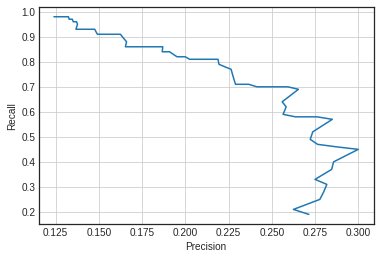

In [ ]:
pr_all = []
rec_all = []
ndcg_all = []
for i in range(70,800, 10):
    pr, rec = pr_at_k(scores, targets, k=i)
    pr_all.append(pr)
    rec_all.append(rec)
    o_ndcg = ndcg(scores, targets, k=i)
    ndcg_all.append(o_ndcg)

fig, ax = plt.subplots()
ax.plot(pr_all, rec_all)

ax.set(xlabel='Precision', ylabel='Recall')
ax.grid()

plt.show()

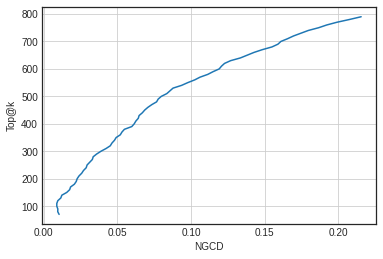

In [ ]:
fig, ax = plt.subplots()
ax.plot(ndcg_all, list(range(70, 800, 10)))

ax.set(xlabel='NGCD', ylabel='Top@k')
ax.grid()

plt.show()

#**Actividad 3**
<br>

###**1 - A parte del rendimiento del sistema recomendador, ¿qué otros aspectos le parece importante medir en un sistema como el desarrollado? De uno o dos y brevemente describa (1-3 frases) por qué es relevante.***

<br>

Las limitaciones, beneficios y dificultades, de las   diferentes estrategias de evaluación. Determinar cuáles de  estas formas de evaluación se adaptan más a  los  sistemas recomendadores de nuestro contenido. Proponer métricas  específicas, relacionadas con las variables que se deben  medir y herramientas de medición, Encuestas a usuarios, que cumplan con los requisitos de validez y confiabilidad  necesarios.

<br>

###**2 - ¿Qué métrica (además de las mencionadas en clases) le podría servir para medir estos aspectos en su modelo? Enumere una o dos métricas.**

<br>


Para calcularla precisión de la predicción de las puntuaciones existen tres métricas mas:

* Error absolutomedio(MAE), Error cuadrático medio(MSE) y raíz de la Desviación Cuadrática Media(RMSE). El MAE mide la diferencia entre la puntuación predicha y la real, eliminar el signo introduciendo la operación de valor absoluto y su expresión es media, puesto que se divide entre el número total de elementos en el conjunto.

<br>

![MAE](https://drive.google.com/uc?export=view&id=1HhG0O5n6BQhSvpLBrC6QmjzqH_IlDrh1)

<br>

* El MSE eleva  al  cuadrado  la  diferencia  entre  la  puntuación  predicha  y  la  real  por  dos razones:  para  poder  eliminar  el  signo  como  en  el  MAE  y  para  penalizar  los  errores grandes. Por ejemplo, si tenemos un error de 0.4 al elevarlo al cuadrado el resultado será 0.16, en cambio sítenemos un error de 3 al elevarlo al cuadrado el resultado será 9. El problema que tiene esta medida es que al estar elevada al cuadrado el resultado no va a  estar  dentro  de  la  escala  de puntuaciones  reales.  Por  ese  motivo  se  utiliza  el RMSE.

<br>

![MSE](https://drive.google.com/uc?export=view&id=19DFKJRP5_LYbhJAypcfZDUXFhu5aPN7x)

<br>

* El RMSE penaliza los errores grandes y elimina el signo al igual que el MSE, pero al hacer la raíz cuadrada del resultado, este se encuentra dentro de la escala de puntuaciones.

<br>

![RMSE](https://drive.google.com/uc?export=view&id=1soF6NXoXIlf7fPfIOKJCIKOzUxQUq0Eg)